In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [93]:
# I'm loading the data from the CSV file using ';' as delimiter since each
# attribute is separated by ';'
data = pd.read_csv("dados_reduzidos.csv", delimiter=";")

In [94]:
# Each sample has an ID, so i'm using this ID as the dataframe index
data.set_index("id", inplace=True)

In [95]:
data

,valor_total,area_util,quartos,vagas,valor_condominio,suites,banheiros,piscina,academia,quadra,...,bairro,qtd_dados_bairro,media_idh,expectativa_vida,renda_percapita,estacao_prox,linha_prox,dist,lat,lon
id,,,,,,,,,,,,,,,,,,,,,
526,189900,32,2,1,180.0,0,1,0,1,0,...,JOSE BONIFACIO,36.0,"0,697181818","72,75181818","559,6681818",SÃO MATEUS,PRATA,"6822,823684","-23,5838787","-46,417548"
734,221110,43,2,1,250.0,0,1,0,0,1,...,JOSE BONIFACIO,36.0,"0,697181818","72,75181818","559,6681818",CORINTHIANS-ITAQUERA,VERMELHA,"4682,709841","-23,5435347","-46,4254919"
738,219990,43,1,1,300.0,0,1,1,0,0,...,JOSE BONIFACIO,36.0,"0,697181818","72,75181818","559,6681818",CORINTHIANS-ITAQUERA,VERMELHA,"4579,311123","-23,5373392","-46,4268225"
753,219990,43,2,1,300.0,0,1,1,0,0,...,JOSE BONIFACIO,36.0,"0,697181818","72,75181818","559,6681818",CORINTHIANS-ITAQUERA,VERMELHA,"4579,311123","-23,5373392","-46,4268225"
924,220000,41,2,1,300.0,0,1,1,1,1,...,JOSE BONIFACIO,36.0,"0,697181818","72,75181818","559,6681818",CORINTHIANS-ITAQUERA,VERMELHA,"3313,918703","-23,5577993","-46,4435232"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,400000,61,1,0,NaN,0,1,0,0,0,...,REPUBLICA,17.0,"0,839666667","79,77666667","1691,543333",REPÚBLICA,AMARELA,"517,30702","-23,5492334","-46,6442819"
2233,688000,146,2,1,600.0,1,3,0,0,0,...,REPUBLICA,17.0,"0,839666667","79,77666667","1691,543333",REPÚBLICA,AMARELA,"452,9508368","-23,5487055","-46,6438873"
2234,275000,40,1,0,382.0,0,1,0,0,0,...,REPUBLICA,17.0,"0,839666667","79,77666667","1691,543333",REPÚBLICA,AMARELA,"362,4140008","-23,5468044","-46,6459634"


In [96]:
data.sort_values(by='valor_total', inplace=True)

In [97]:
# I'm verifying if there is any empty sample by count how many
# columns have missing values
# As we can see, 'valor_condominio' and 'qtd_dados_bairro' have some missing data
data.isna().sum()

valor_total           0
area_util             0
quartos               0
vagas                 0
valor_condominio    235
suites                0
banheiros             0
piscina               0
academia              0
quadra                0
link                  0
bairro                0
qtd_dados_bairro      7
media_idh             0
expectativa_vida      0
renda_percapita       0
estacao_prox          0
linha_prox            0
dist                  0
lat                   0
lon                   0
dtype: int64

In [98]:
# since "qtd_dados_bairro" is the amount of propertis by neighborhood
# we can calculate it from the data, so we can drop it
data.drop('qtd_dados_bairro', inplace=True, axis=1)

In [99]:
# Maybe valor_condominio is unavailable because properties are houses and we can make it 0
data.loc[data['valor_condominio'].isna(), ['valor_condominio']] = 0

In [100]:
data.isna().sum()

valor_total         0
area_util           0
quartos             0
vagas               0
valor_condominio    0
suites              0
banheiros           0
piscina             0
academia            0
quadra              0
link                0
bairro              0
media_idh           0
expectativa_vida    0
renda_percapita     0
estacao_prox        0
linha_prox          0
dist                0
lat                 0
lon                 0
dtype: int64

In [101]:
def format_float(row):
    columns = ['media_idh', 'expectativa_vida', 'renda_percapita', 'dist', 'lat', 'lon']
    for col in columns:
        row[col] = float(row[col].replace(',', '.'))
    return row

In [102]:
# Make numeric values as float
data = data.apply(format_float, axis=1)

In [103]:
data.dtypes

valor_total           int64
area_util             int64
quartos               int64
vagas                 int64
valor_condominio    float64
suites                int64
banheiros             int64
piscina               int64
academia              int64
quadra                int64
link                 object
bairro               object
media_idh           float64
expectativa_vida    float64
renda_percapita     float64
estacao_prox         object
linha_prox           object
dist                float64
lat                 float64
lon                 float64
dtype: object

Text(0, 0.5, 'Total price')

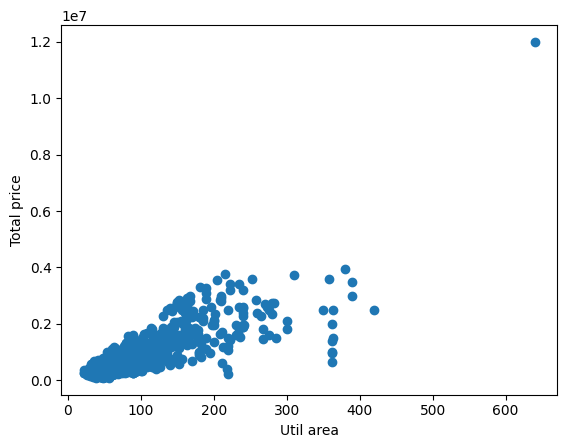

In [104]:
# Plotting the price over the util area
plt.scatter(data["area_util"], data["valor_total"])
plt.xlabel("Util area")
plt.ylabel("Total price")

We can see that the price increases when the util area increases

In [105]:
grouped_by_neighborhood = data.groupby(['bairro'])

In [106]:
# Here, i'm getting the number of properties by neighborhood
properties_by_neighborhood = grouped_by_neighborhood.valor_total.count().sort_values()[-10:]

Text(0.5, 0, 'Neighborhood')

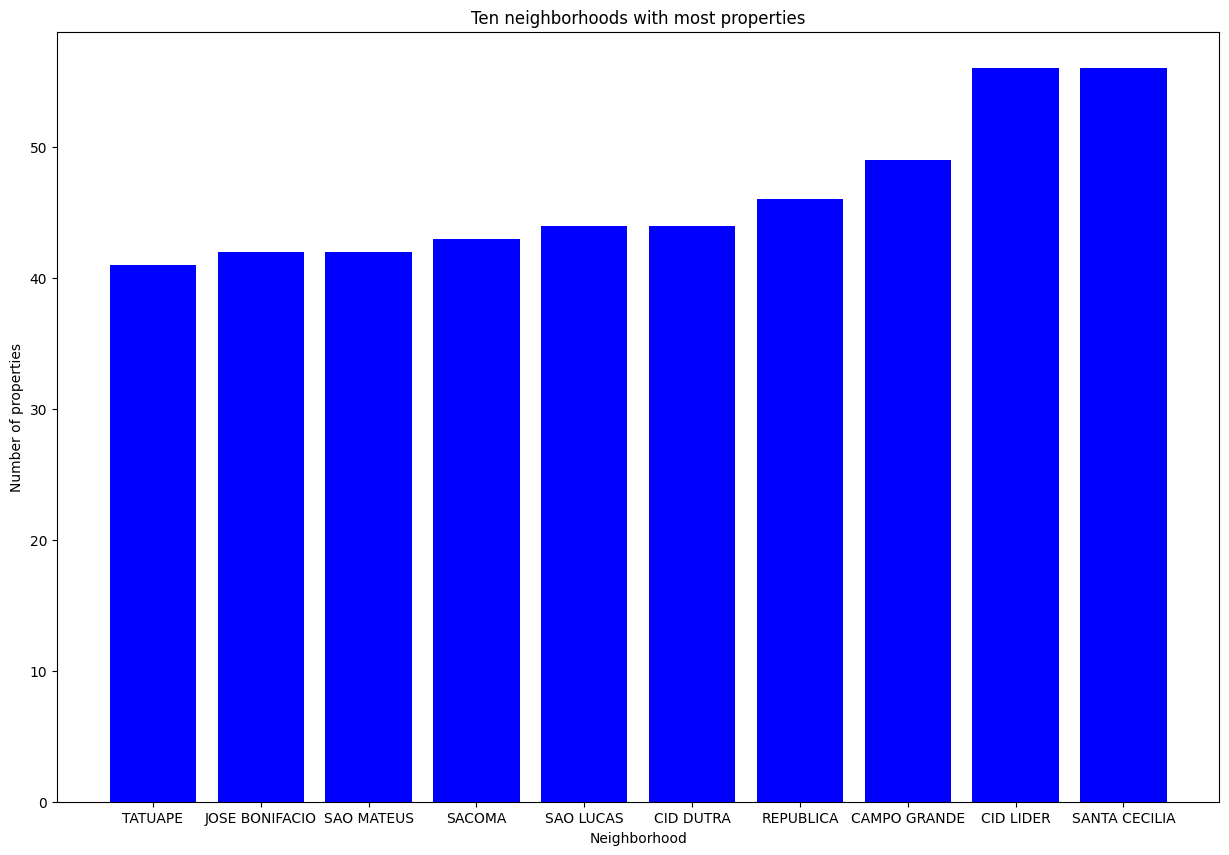

In [107]:
plt.figure(figsize=(15,10))
plt.bar(properties_by_neighborhood.index, properties_by_neighborhood, color='blue')
plt.title('Ten neighborhoods with most properties')
plt.ylabel('Number of properties')
plt.xlabel('Neighborhood')

In [108]:
max_price_by_neighborhood = grouped_by_neighborhood.valor_total.max().sort_values()[-10:]

<BarContainer object of 10 artists>

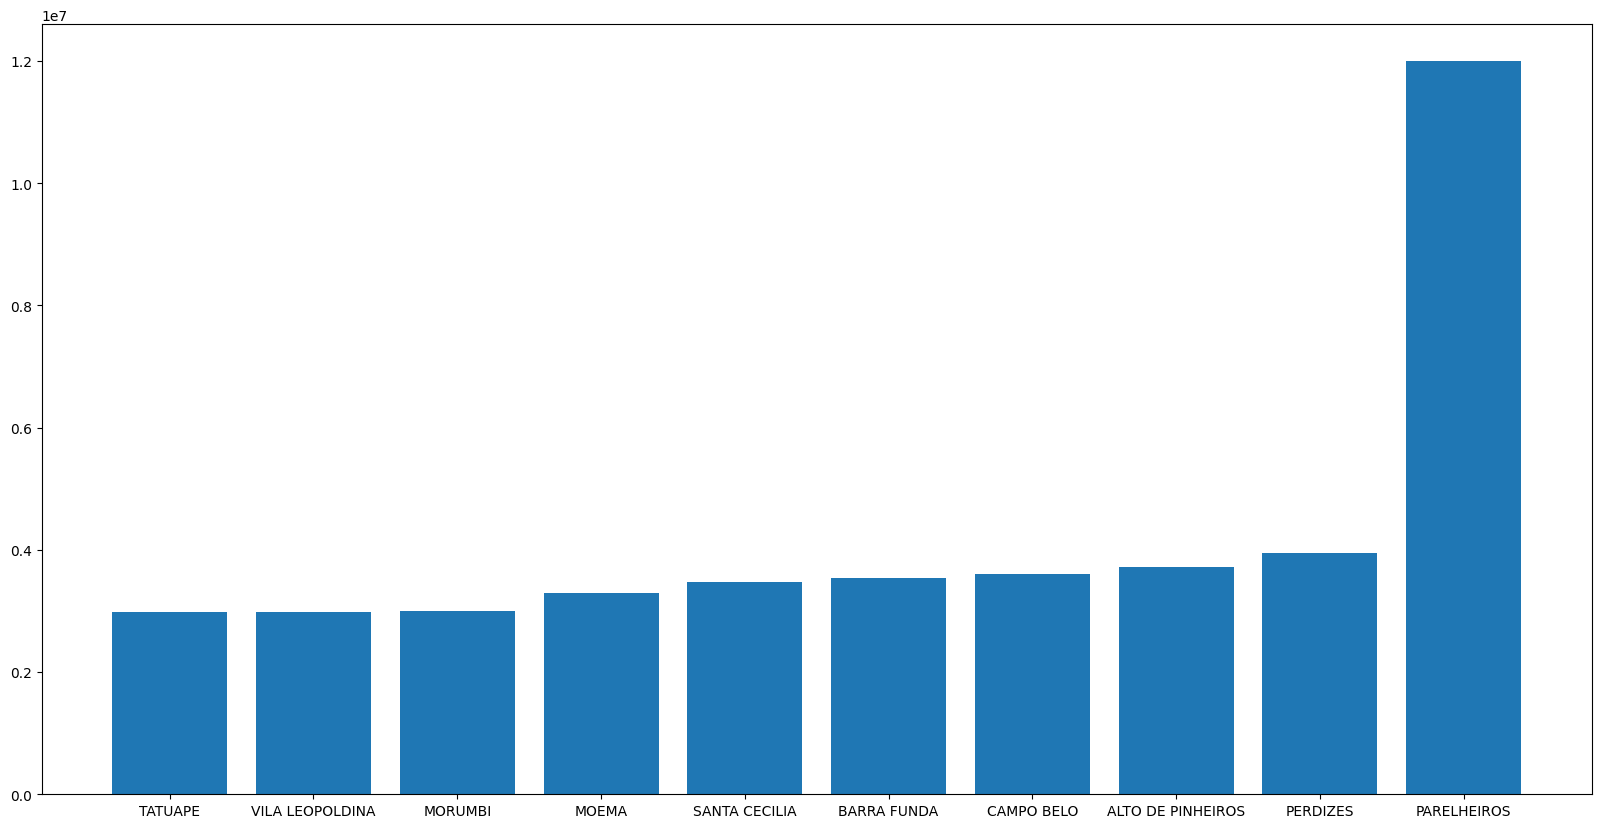

In [109]:
plt.figure(figsize=(20,10))
plt.bar(max_price_by_neighborhood.index, max_price_by_neighborhood)

Parelheiros has the most expensive property compared to other neighborhoods

Text(0.5, 0, 'Distance to nearest bus stop')

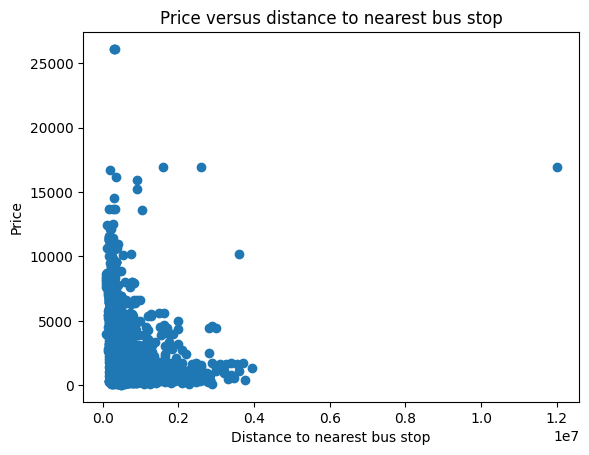

In [110]:
plt.scatter(data['valor_total'], data['dist'])
plt.title('Price versus distance to nearest bus stop')
plt.ylabel('Price')
plt.xlabel('Distance to nearest bus stop')

There is no clear relation between the property price and the distance to the nearest bus stop

Text(0, 0.5, 'Renda per capita')

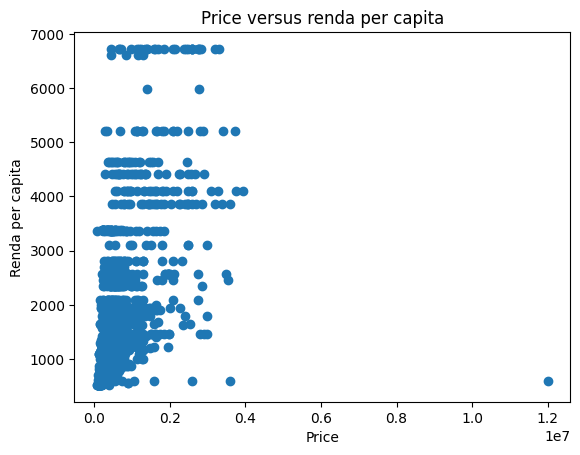

In [111]:
plt.scatter(data['valor_total'], data['renda_percapita'])
plt.title('Price versus renda per capita')
plt.xlabel('Price')
plt.ylabel('Renda per capita')
# There is no interesting relation between price and 'rendapercapita'

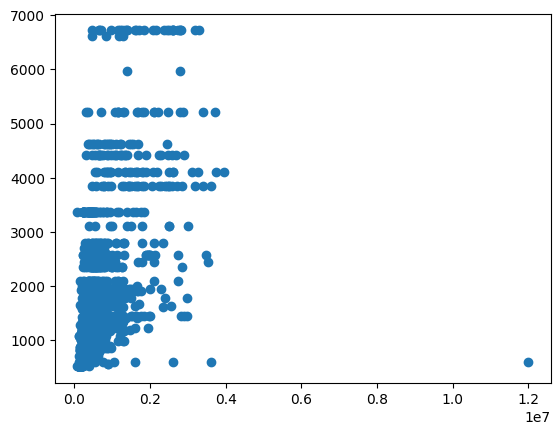

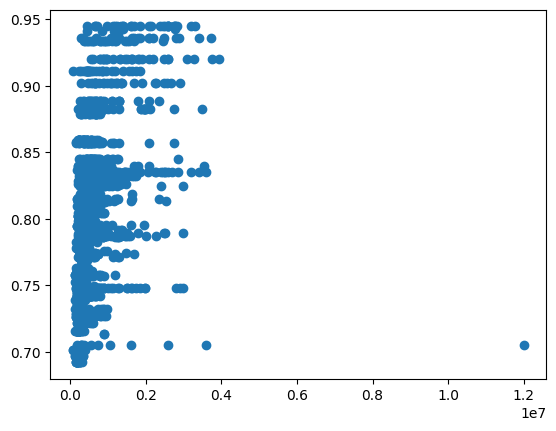

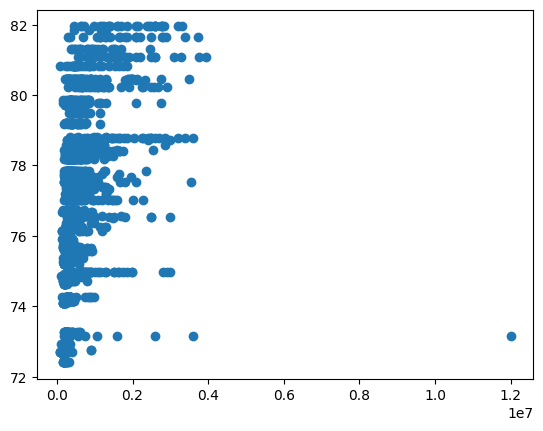

In [112]:
columns = ['renda_percapita', 'media_idh', 'expectativa_vida']
for idx, col in enumerate(columns):
    plt.figure()
    plt.scatter(data['valor_total'], data[col])

In [113]:
columns = [
    'banheiros', 'quartos', 'suites'
]

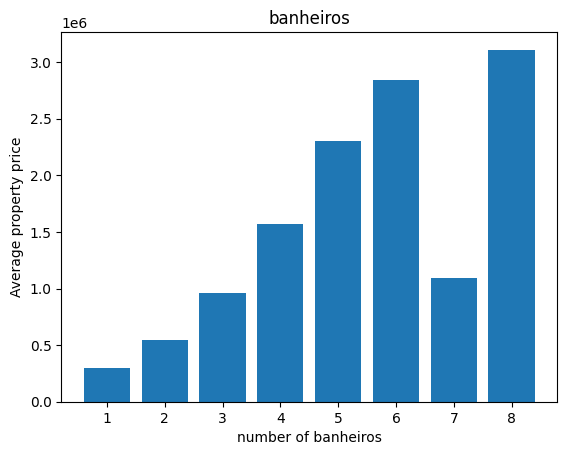

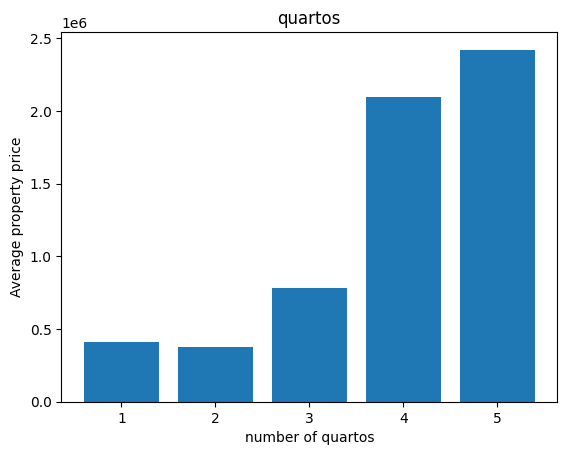

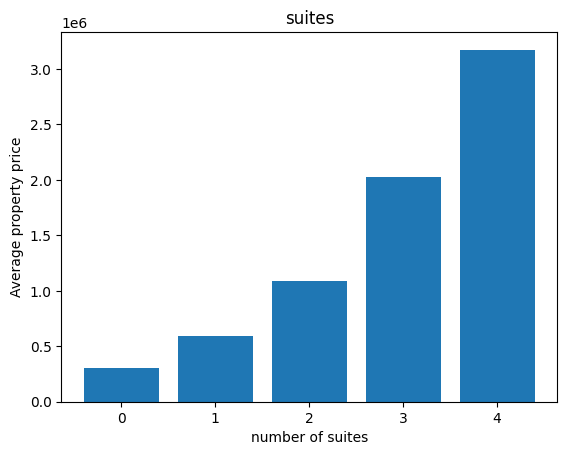

In [ ]:
for idx, col in enumerate(columns):
    d = data.groupby(col).valor_total.mean()
    plt.figure()
    plt.bar(list(map(str,d.index.values)), d)
    plt.title(col)
    plt.ylabel('Average property price')
    plt.xlabel("number of " + col)

The average price of one property increases when the amount of suites, bathrooms or rooms also increases.
The interesting about the price in relation to the number of bathrooms is that for 7 bathrooms there is a hugh decrease in average price

In [115]:
bool_columns = ['piscina', 'academia', 'quadra']

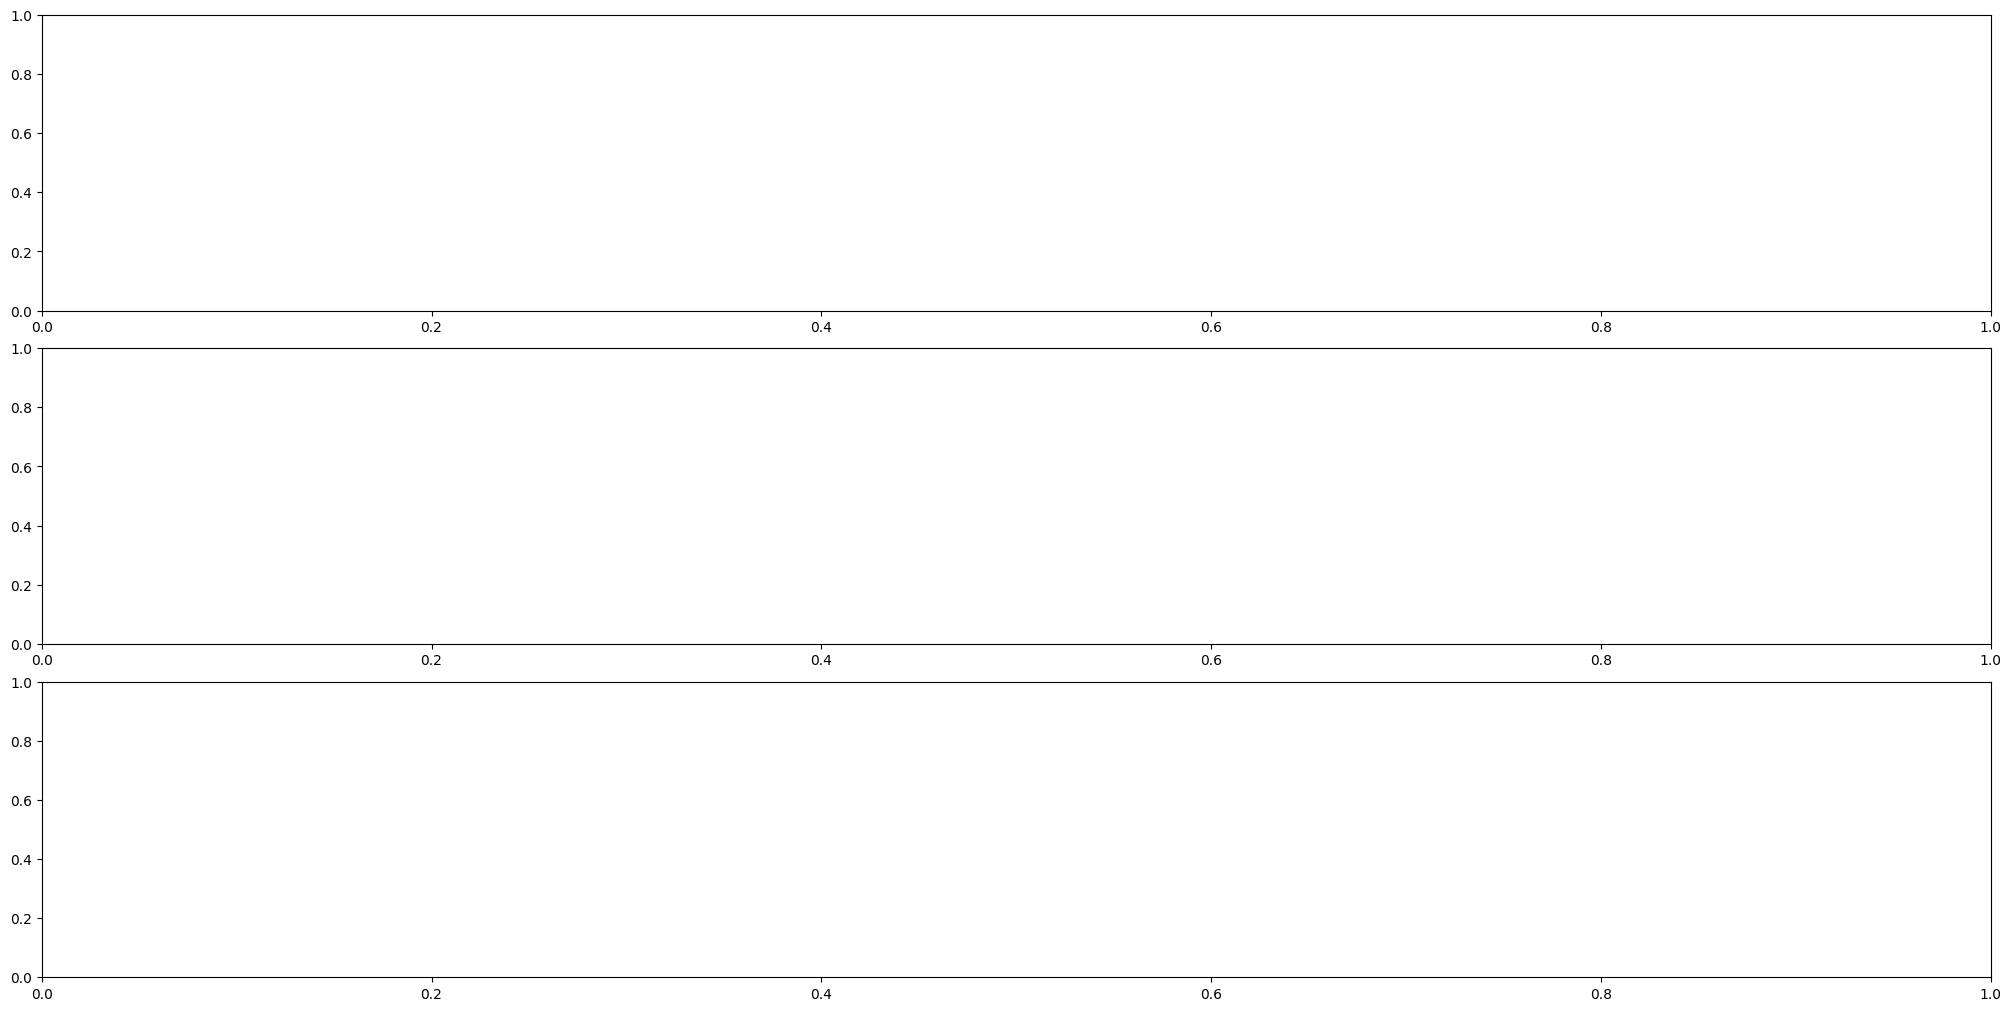

In [116]:
fig, axes = plt.subplots(len(bool_columns), figsize=(20,10), layout='constrained')

In [117]:
for idx,col in enumerate(bool_columns):
    d = data.groupby(col).valor_total.min()
    axes[idx].bar(list(map(str,d.index.values)), d)
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Price')
    axes[idx].set_xlabel(f'Has {col}')

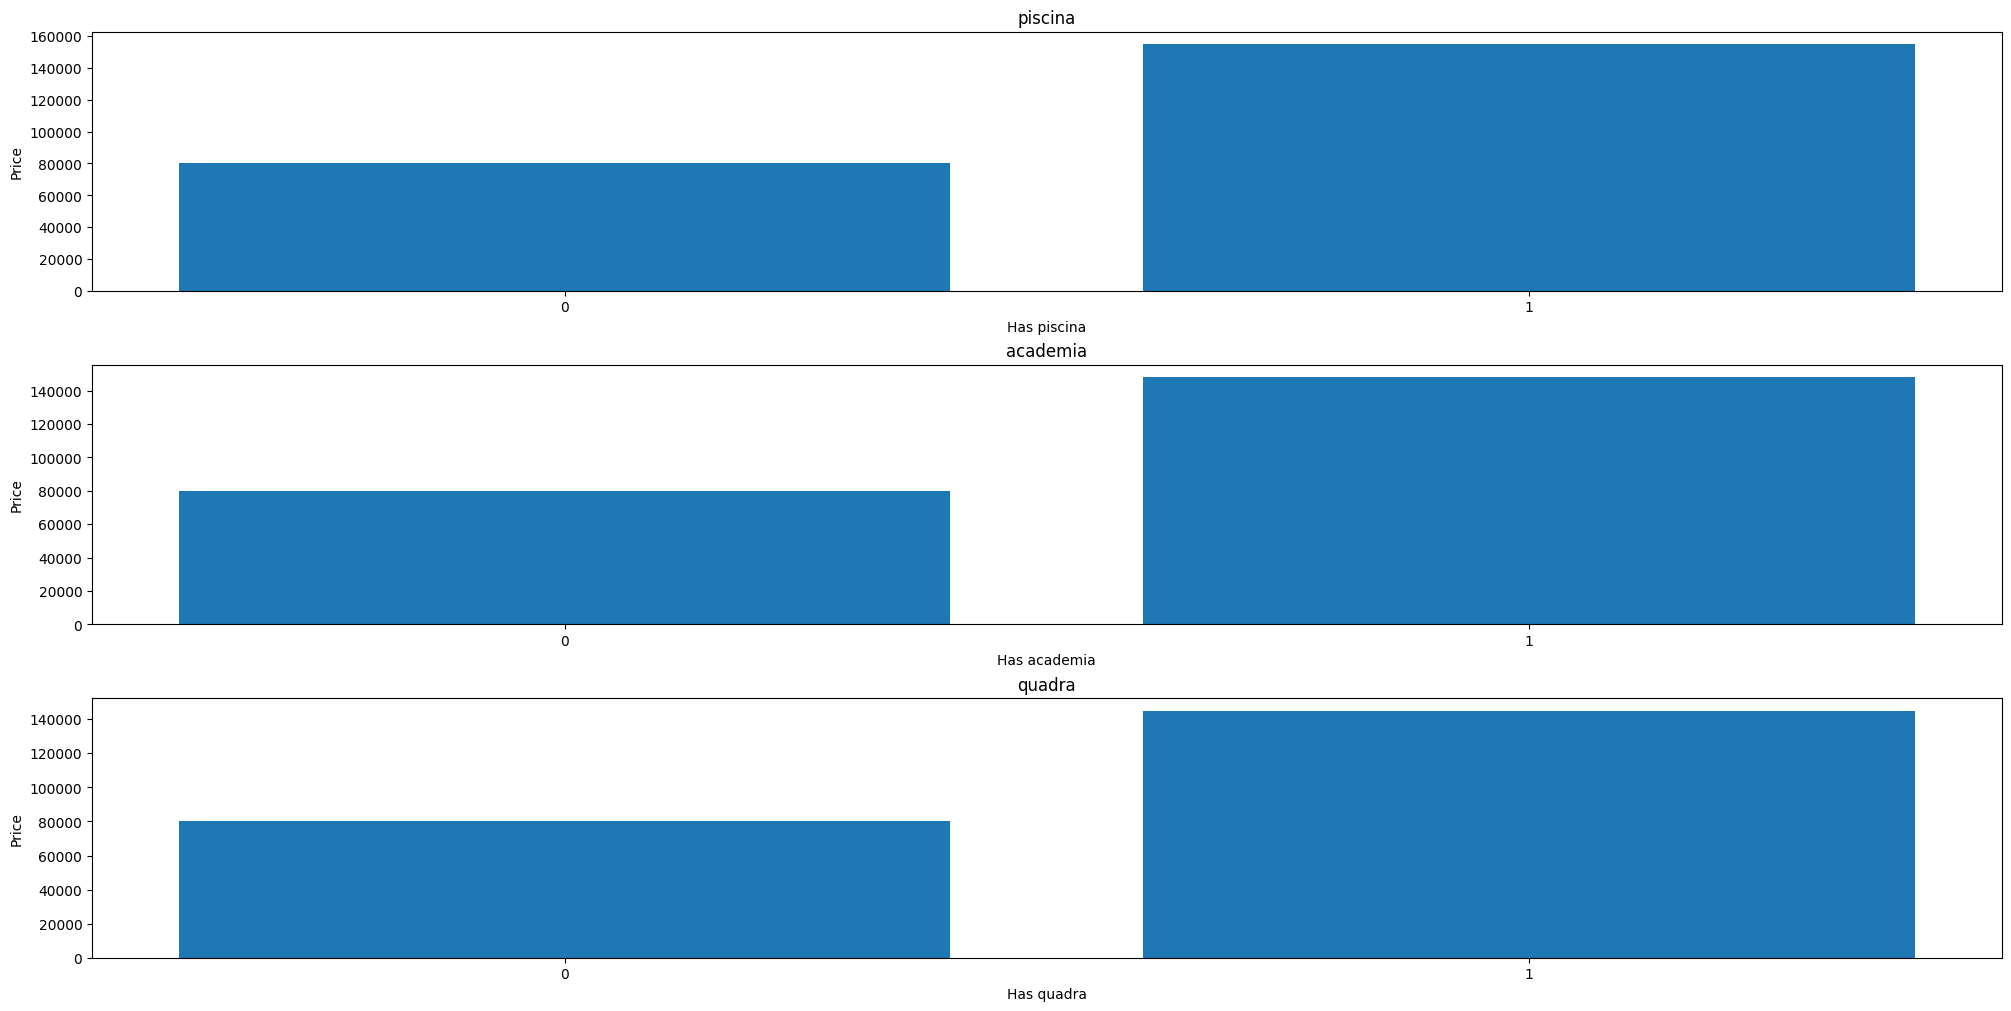

In [118]:
fig

From the chart above, we can see that the minimum money you must have before selecting between pool or gym is twice the value.
Maybe it's a high correlate because all these properties are in a condominium

In [119]:
avg_price_by_neighborhood = grouped_by_neighborhood.valor_total.mean()